<a href="https://colab.research.google.com/github/kiet0807/CS114.L21/blob/main/CNN_Clothes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import pandas as pd

In [2]:
# Load bộ dữ liệu bao gồm file train và file test

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Kích thước bộ dataset
# Hình ảnh có kích thước 28x28

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [4]:
# Số lượng ảnh train và ảnh test

print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

60000 train set
10000 test set


In [132]:
# Xác định label để vẽ biểu đồ

fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9



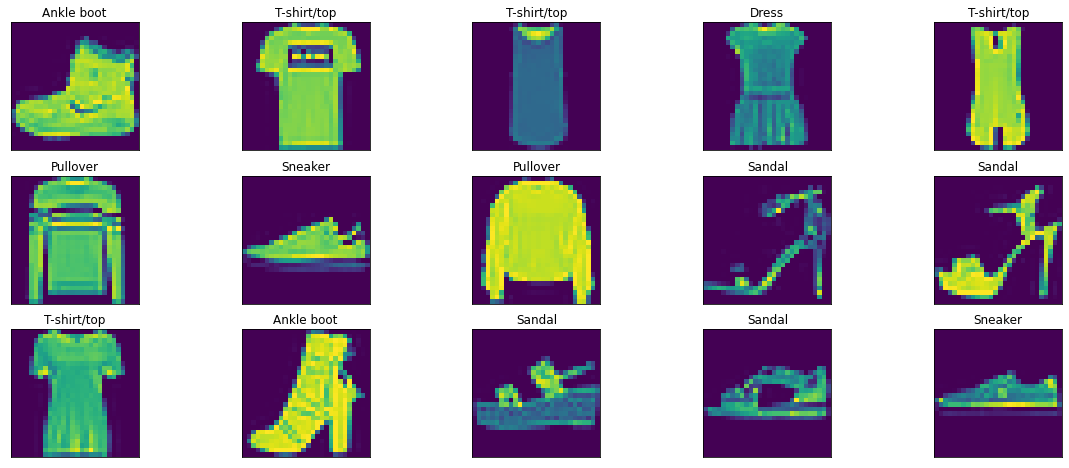

In [133]:
figure = plt.figure(figsize=(20, 8))
for i in range(15):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(fashion_mnist_labels[y_train[i]]))

In [6]:
#Reshape hình ảnh có tỉ lệ 28 x 28 x 1

w, h = 28, 28

x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

x_train.shape

(60000, 28, 28, 1)

In [7]:
# Set layer

model = tf.keras.Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [8]:
# Train model

BATCH_SIZE=1000
EPOCHS = 100

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
%time history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)

Epoch 1/100
48/48 [==============================] - 51s 1s/step - loss: 5.5948 - accuracy: 0.4016 - val_loss: 0.9671 - val_accuracy: 0.6620
Epoch 2/100
48/48 [==============================] - 49s 1s/step - loss: 1.1027 - accuracy: 0.5936 - val_loss: 0.6716 - val_accuracy: 0.7372
Epoch 3/100
48/48 [==============================] - 49s 1s/step - loss: 0.8657 - accuracy: 0.6787 - val_loss: 0.5812 - val_accuracy: 0.7752
Epoch 4/100
48/48 [==============================] - 49s 1s/step - loss: 0.7677 - accuracy: 0.7143 - val_loss: 0.5356 - val_accuracy: 0.7861
Epoch 5/100
48/48 [==============================] - 48s 1s/step - loss: 0.7099 - accuracy: 0.7335 - val_loss: 0.5078 - val_accuracy: 0.8011
Epoch 6/100
48/48 [==============================] - 49s 1s/step - loss: 0.6687 - accuracy: 0.7482 - val_loss: 0.4819 - val_accuracy: 0.8120
Epoch 7/100
48/48 [==============================] - 49s 1s/step - loss: 0.6314 - accuracy: 0.7605 - val_loss: 0.4634 - val_accuracy: 0.8224
Epoch 8/100
4

In [134]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, batch_size=BATCH_SIZE)
print("Train Accuracy: " ,train_accuracy)
print("Train Loss: " ,train_loss)

60/60 [==============================] - 12s 203ms/step - loss: 0.1517 - accuracy: 0.9459
Train Accuracy:  0.9459333419799805
Train Loss:  0.1517147421836853


In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print("Test Accuracy: " ,test_accuracy)
print("Test Loss: " ,test_loss)

10/10 [==============================] - 2s 205ms/step - loss: 0.2329 - accuracy: 0.9169
Test Accuracy:  0.9168999791145325
Test Loss:  0.23288178443908691


In [54]:
y_hat = model.predict(x_test)
y_hat[0]

array([7.1030049e-16, 1.2496772e-16, 5.5819744e-18, 1.5573324e-12,
       1.4205805e-18, 6.9209176e-07, 9.4891890e-15, 5.4782990e-04,
       1.4203729e-13, 9.9945146e-01], dtype=float32)

In [55]:
np.argmax(y_hat[0])

9

In [56]:
y_test[0]

9

Text(0.5, 1.0, 'Coat 82% (Shirt)')

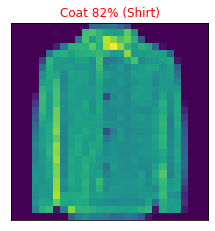

In [120]:
index = 2540
figure = plt.figure(figsize=(20, 8))
ax = figure.add_subplot(2, 2, 1, xticks=[], yticks=[])
    
ax.imshow(np.squeeze(x_test[index]))
predict_index = np.argmax(y_hat[index])
true_index = y_test[index]
    
ax.set_title("{} {:2.0f}% ({})".format(fashion_mnist_labels[predict_index],
                                  100*np.max(y_hat[index]), 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

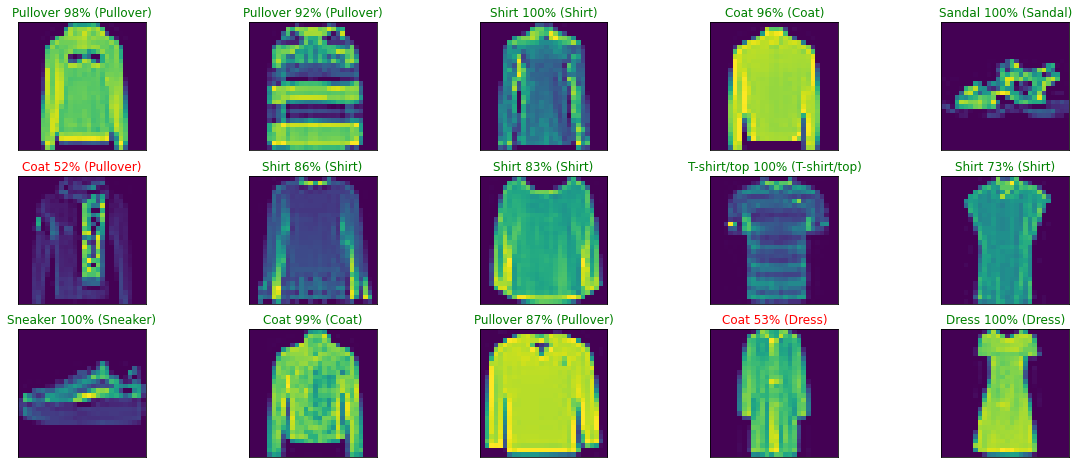

In [122]:
# In 15 hình ngẫu nhiên trong file test có lable model dự đoán và lable thật của ảnh
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    
    ax.set_title("{} {:2.0f}% ({})".format(fashion_mnist_labels[predict_index],
                                  100*np.max(y_hat[index]), 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

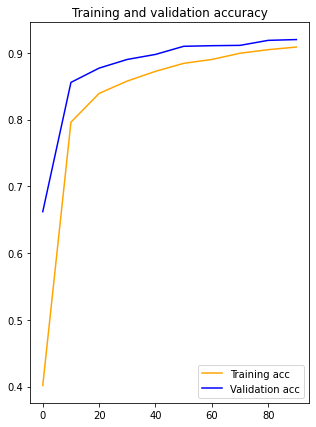

In [17]:
# Biểu đồ train accuracy và val_accuracy

def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    every_sample =  int(epochs / samples)
    acc = pd.DataFrame(acc).iloc[::every_sample, :]
    val_acc = pd.DataFrame(val_acc).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(5,7))

    ax.plot(acc, 'b', label='Training acc', color = 'orange')
    ax.plot(val_acc, 'b', label='Validation acc')
    ax.set_title('Training and validation accuracy')
    ax.legend()

plot_history(history)

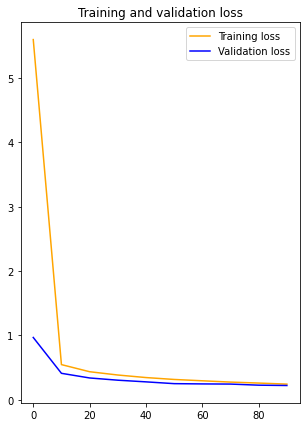

In [13]:
# Biểu đồ train loss và val_loss

def plot_history(history, samples=10, init_phase_samples=None):
    epochs = history.params['epochs']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    every_sample =  int(epochs / samples)
    loss = pd.DataFrame(loss).iloc[::every_sample, :]
    val_loss = pd.DataFrame(val_loss).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(5,7))

    ax.plot(loss, 'b', label='Training loss', color = 'orange')
    ax.plot(val_loss, 'b', label='Validation loss')
    ax.set_title('Training and validation loss')
    ax.legend()

plot_history(history)